In [1]:
!pip install seaborn matplotlib

In [2]:
import pandas as pd
import rdflib as rdflib
import smartpynector as sp

In [3]:
# reading triples from GraphDB
READ_URL = "https://graphdb.odissei.nl/repositories/MateuszTest"
WRITE_URL = "https://graphdb.odissei.nl/repositories/MateuszTest/statements"

triples =sp.read_triples_from_graphdb(
    read_url=READ_URL,
    write_url=WRITE_URL,
)

# for triple in triples:
#     print(triple)

In [4]:
query = """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX saref: <https://w3id.org/saref#>

    SELECT *
    WHERE {
        ?meas rdf:type saref:Measurement .
        ?meas saref:hasValue ?temp .
        ?meas saref:isMeasuredIn saref:TemperatureUnit .
        ?meas saref:hasTimestamp ?timestamp .
        ?meas saref:isMeasurementOf ?room_id .
        ?meas saref:relatesToProperty saref:Temperature .
        ?meas saref:measurementMadeBy ?device_id .
    }
"""

results = sp.run_sparql_query(READ_URL, query, return_format="json")
df = sp.sparql_results_to_df(results)
df['temp']=df['temp'].astype('int')

df

,meas,temp,timestamp,room_id,device_id
0,http://127.0.0.1:8000/thermostat/measurements/...,20,2023-05-03T18:37:03+02:00,http://127.0.0.1:8000/thermostat/rooms/1,http://127.0.0.1:8000/thermostat/devices/1
1,http://127.0.0.1:8000/thermostat/measurements/...,20,2023-05-03T18:38:24+02:00,http://127.0.0.1:8000/thermostat/rooms/1,http://127.0.0.1:8000/thermostat/devices/1
2,http://127.0.0.1:8000/thermostat/measurements/...,44,2023-05-03T20:11:36+02:00,http://127.0.0.1:8000/thermostat/rooms/1,http://127.0.0.1:8000/thermostat/devices/1
3,http://127.0.0.1:8000/thermostat/measurements/...,20,2023-05-03T20:47:53+02:00,http://127.0.0.1:8000/thermostat/rooms/1,http://127.0.0.1:8000/thermostat/devices/1
4,http://127.0.0.1:8000/thermostat/measurements/...,20,2023-05-03T21:41:13+02:00,http://127.0.0.1:8000/thermostat/rooms/1,http://127.0.0.1:8000/thermostat/devices/1
5,http://127.0.0.1:8000/thermostat/measurements/...,20,2023-05-03T21:48:37+02:00,http://127.0.0.1:8000/thermostat/rooms/1,http://127.0.0.1:8000/thermostat/devices/1
6,http://127.0.0.1:8000/thermostat/measurements/...,20,2023-05-03T21:50:58+02:00,http://127.0.0.1:8000/thermostat/rooms/1,http://127.0.0.1:8000/thermostat/devices/1
7,http://127.0.0.1:8000/thermostat/measurements/...,20,2023-05-03T22:12:15+02:00,http://127.0.0.1:8000/thermostat/rooms/1,http://127.0.0.1:8000/thermostat/devices/1
8,http://127.0.0.1:8000/thermostat/measurements/...,20,2023-05-12T16:19:27+02:00,http://127.0.0.1:8000/thermostat/rooms/1,http://127.0.0.1:8000/thermostat/devices/1
9,http://0.0.0.0:8001/thermostat/measurements/5e...,20,2023-05-13T20:43:29+00:00,http://0.0.0.0:8001/thermostat/rooms/1,http://0.0.0.0:8001/thermostat/devices/1


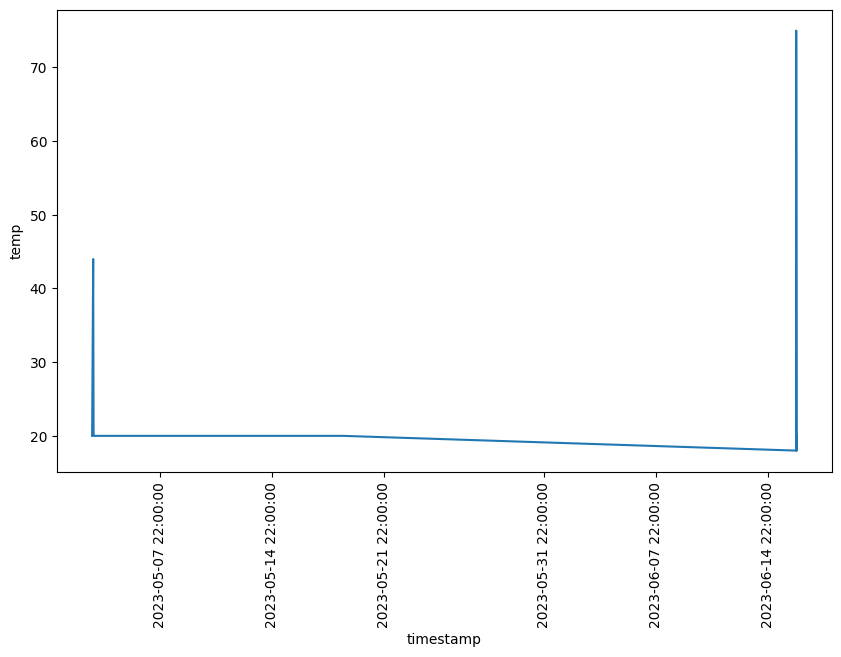

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

# assuming `df` is the DataFrame containing the SPARQL query results
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp")

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="timestamp", y="temp")
plt.xticks(rotation=90)
# plt.gca().invert_yaxis()

date_format = DateFormatter("%Y-%m-%d %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph

# Convert the SPARQL query results into an rdflib.Graph object
g = sp.convert_sparql_results_to_graph(results)

# Convert the rdflib.Graph object into a NetworkX graph
G = rdflib_to_networkx_multidigraph(g)

ModuleNotFoundError: No module named 'networkx'

In [ ]:
# Plot the NetworkX graph using Matplotlib
pos = nx.spring_layout(G, scale=1)
edge_labels = nx.get_edge_attributes(G, "r")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, with_labels=True)

plt.figure(figsize=(50, 50))
plt.show()